In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('ikea2.csv')
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [3]:
data.shape

(3694, 18)

In [4]:
data.describe()

,item_id,price,depth,height,width,topic_group
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000,1409.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853,1.102910
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771,0.852835
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000,0.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000,1.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000,2.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            3694 non-null   object 
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                2231 non-null   float64
 11  height               2706 non-null   float64
 12  width                3105 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  kewords              1394 non-null   o

In [6]:
data.rename(columns={'kewords': 'keywords'}, inplace=True)

**Data Cleaning and Preprocessing Tasks:**

Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.

In [7]:
data.isnull().sum()

,0
item_id,0
name,0
category,0
price,0
old_price,0
sellable_online,0
link,0
other_colors,0
short_description,0
designer,0


In [8]:
data['keywords'].value_counts()

,count
keywords,
white keep neat lets use Find suitable use humid,23
fitted online stylish,18
white build wide low different create perfect clean modern easy place,16
white icing small makes big Clean discreet blend right enhance modern,15
light white stained need good ‚Äì sturdy wooden lightweight slide put,13
...,...
slatted grows extend replace want change,1
bed frame w hidden several saving store want close small-space,1
slatted white extendable ‚Äì lightening made timeless easy match,1


In [9]:
data['height'].value_counts()

,count
height,
74.0,189
236.0,113
75.0,82
73.0,77
83.0,73
...,...
113.0,1
108.0,1
700.0,1


In [10]:
data['topic_desc'].value_counts()

,count
topic_desc,
Durability and Appearance,592
"Color and Aesthetics, Usability",447
Style and Functionality,370


In [11]:
data['topic_group'].value_counts()

,count
topic_group,
2.0,592
0.0,447
1.0,370


Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).


In [12]:
data['old_price'].value_counts()

,count
old_price,
No old price,3040
SR 995,12
"SR 1,385",11
SR 595,10
SR 275,8
...,...
"SR 2,395",1
"SR 1,250",1
"SR 1,815",1


In [13]:
data['price'].value_counts()

,count
price,
395.0,66
195.0,54
25.0,54
175.0,51
995.0,51
...,...
1277.0,1
4190.0,1
206.5,1


In [14]:
def clean_and_update_old_price(data):

    data['old_price_clean'] = (
        data['old_price']
        .astype(str)
        .str.strip()
        .str.replace("SR", "", regex=False)  # "SR" işarəsini silirik
        .str.replace(",", "", regex=False)   # Vergül işarələrini silirik
        .str.replace(r"/.*", "", regex=True)  # "SR"dan sonra olan hər şeyi silirik
        .str.replace("No old price", "", regex=False)  # "No old price" ifadəsini silirik
        .str.strip()  # Boşluqları təmizləyirik
    )

    # Təmizlənmiş qiymətləri rəqəmə çeviririk
    data['old_price_clean'] = pd.to_numeric(data['old_price_clean'], errors='coerce')

    # old_price_clean NaN olduqda price dəyərini təyin edirik
    data['old_price_clean'] = data.apply(
        lambda row: row['price'] if pd.isna(row['old_price_clean']) else row['old_price_clean'],
        axis=1
    )

    return data

data = clean_and_update_old_price(data)

print(data[['old_price', 'old_price_clean', 'price']].head(20))

       old_price  old_price_clean   price
0   No old price            265.0   265.0
1   No old price             69.0    69.0
2         SR 295            295.0   177.0
3   No old price            345.0   345.0
4   No old price            395.0   395.0
5         SR 175            175.0   140.0
6   No old price            595.0   595.0
7         SR 995            995.0   796.0
8   No old price            695.0   695.0
9   No old price            595.0   595.0
10  No old price            435.0   435.0
11      SR 1,385           1385.0  1266.0
12  No old price             40.0    40.0
13  No old price            395.0   395.0
14  No old price           1385.0  1385.0
15      SR 2,375           2375.0  2176.0
16  No old price            745.0   745.0
17  No old price           1385.0  1385.0
18      SR 1,385           1385.0  1266.0
19      SR 1,385           1385.0  1266.0


In [15]:
data = data.drop(columns=['old_price'])

data.to_excel('cleaned_data.xlsx', index=False)

In [16]:
data = pd.read_excel('cleaned_data.xlsx')

In [17]:
print(data.isnull().sum())

item_id                   0
name                      0
category                  0
price                     0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
old_price_clean           0
dtype: int64


In [18]:
total_rows = len(data)

nan_percent=(data.isnull().sum()/total_rows)*100
nan_percent = nan_percent.round(2)
print(nan_percent)

item_id                 0.00
name                    0.00
category                0.00
price                   0.00
sellable_online         0.00
link                    0.00
other_colors            0.00
short_description       0.00
designer                0.00
depth                  39.60
height                 26.75
width                  15.94
product_description     0.00
current_status          0.00
keywords               62.26
topic_group            61.86
topic_desc             61.86
old_price_clean         0.00
dtype: float64


In [19]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  item_id     price  sellable_online     depth    height  \
item_id          1.000000  0.062683         0.015255  0.037860  0.050827   
price            0.062683  1.000000         0.040226  0.630212  0.278621   
sellable_online  0.015255  0.040226         1.000000  0.069356  0.050117   
depth            0.037860  0.630212         0.069356  1.000000 -0.078930   
height           0.050827  0.278621         0.050117 -0.078930  1.000000   
width            0.066825  0.697276         0.063574  0.433480  0.379496   
topic_group     -0.027098 -0.053425        -0.074468 -0.069800 -0.093773   
old_price_clean  0.063274  0.993866         0.040125  0.631458  0.271212   

                    width  topic_group  old_price_clean  
item_id          0.066825    -0.027098         0.063274  
price            0.697276    -0.053425         0.993866  
sellable_online  0.063574    -0.074468         0.040125  
depth            0.433480    -0.069800         0.631458  
height           0.379496

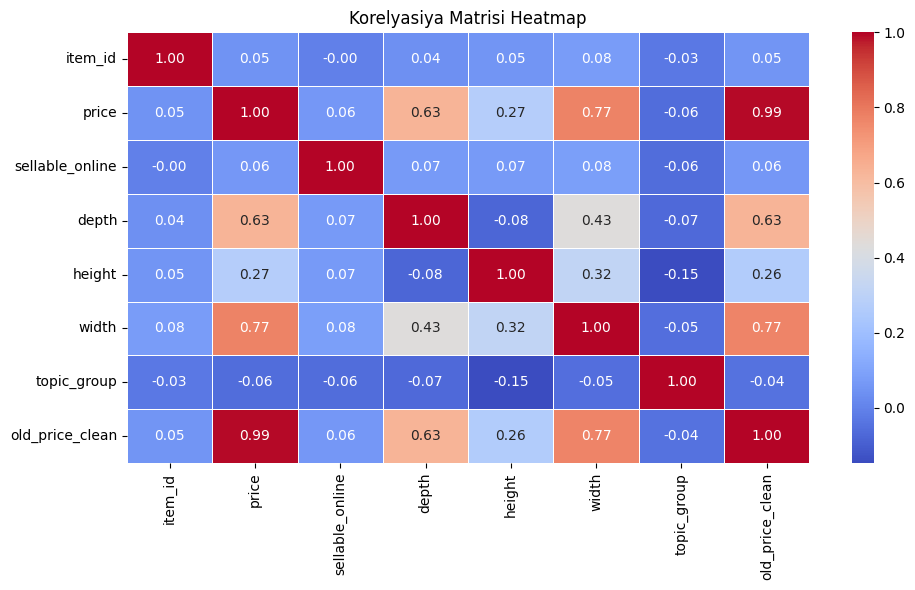

In [20]:
data_corr = data.dropna(subset=['depth'])

correlation_matrix = data_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelyasiya Matrisi Heatmap")
plt.tight_layout()
plt.show()

KNI Imputer

In [21]:
from sklearn.impute import KNNImputer

data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

imputer = KNNImputer(n_neighbors=5)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])
data['depth'] = data_encoded['depth']

In [22]:
data.columns

Index(['item_id', 'name', 'category', 'price', 'sellable_online', 'link',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width', 'product_description', 'current_status', 'keywords',
       'topic_group', 'topic_desc', 'old_price_clean'],
      dtype='object')

In [23]:
data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])

data['width'] = data_encoded['width']
data['height'] = data_encoded['height']

In [24]:
data.shape

(3694, 18)

In [25]:
print(data.isnull().sum())

item_id                   0
name                      0
category                  0
price                     0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                     0
height                    0
width                     0
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
old_price_clean           0
dtype: int64


In [26]:
data['keywords'].fillna('', inplace=True)
data['topic_group'].fillna('', inplace=True)
data['topic_desc'].fillna('', inplace=True)

<ipython-input-26-0c7ff2cfc4f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['keywords'].fillna('', inplace=True)
<ipython-input-26-0c7ff2cfc4f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [27]:
print(data.isnull().sum())

item_id                0
name                   0
category               0
price                  0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
keywords               0
topic_group            0
topic_desc             0
old_price_clean        0
dtype: int64


Boolean Conversion: Ensure the sellable_online column is a proper boolean type.

In [28]:
data['sellable_online'] = data['sellable_online'].astype(bool)

<ipython-input-29-182acfaef937>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sellable_online', data=data, palette='Set2')


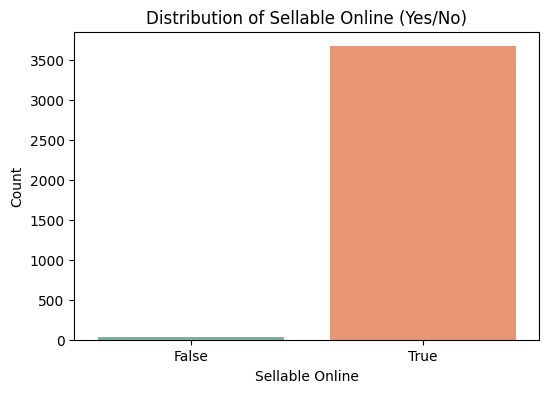

In [29]:
data['sellable_online'].value_counts()

# Plot the distribution of 'yes' and 'no'
plt.figure(figsize=(6, 4))
sns.countplot(x='sellable_online', data=data, palette='Set2')
plt.title('Distribution of Sellable Online (Yes/No)')
plt.xlabel('Sellable Online')
plt.ylabel('Count')
plt.show()

**Exploratory Data Analysis (EDA) Tasks:**

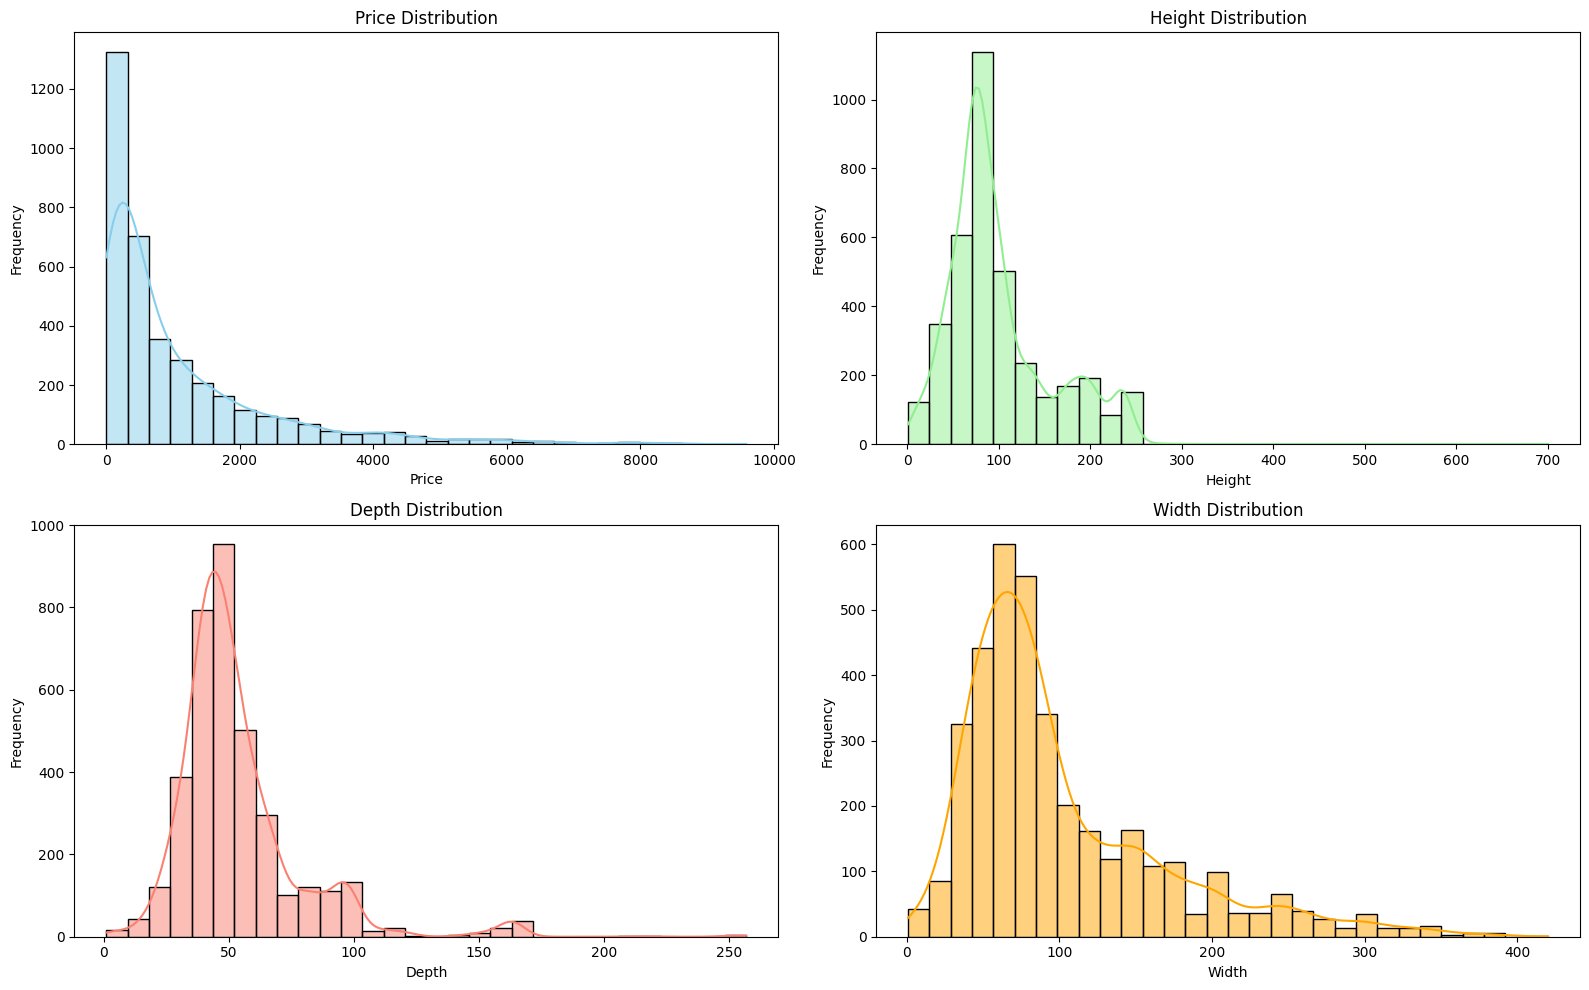

In [30]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['height'], kde=True, color='lightgreen', bins=30)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['depth'], kde=True, color='salmon', bins=30)
plt.title('Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data['width'], kde=True, color='orange', bins=30)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


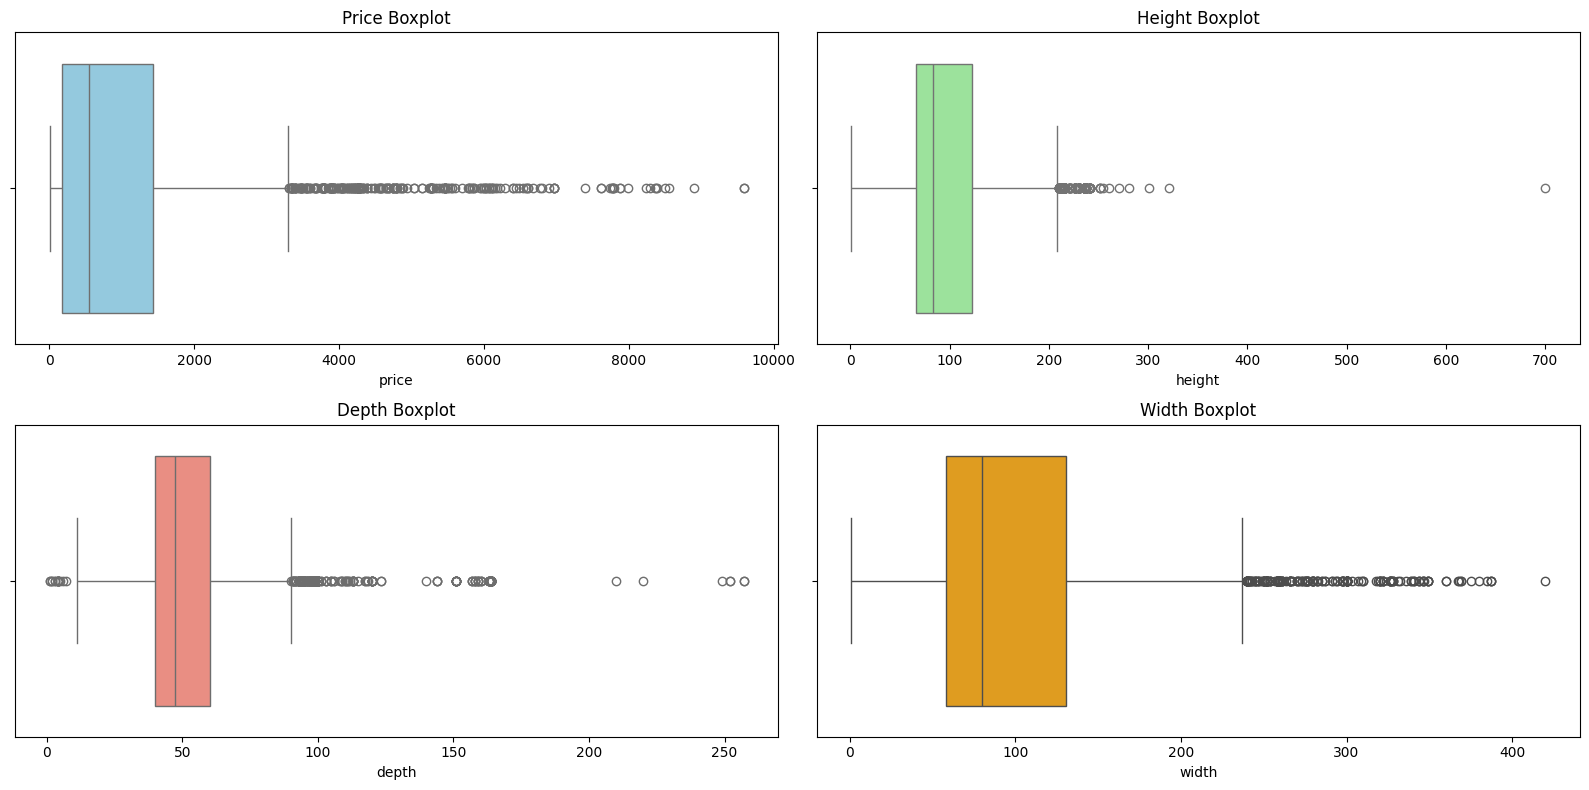

In [31]:
# Box plots for price, height, depth, and width
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['height'], color='lightgreen')
plt.title('Height Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['depth'], color='salmon')
plt.title('Depth Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['width'], color='orange')
plt.title('Width Boxplot')

plt.tight_layout()
plt.show()

Category Insights: Find the most common product categories and their average prices.

In [32]:
most_common_category = data['category'].value_counts().idxmax()
category_counts = data['category'].value_counts()

print(f"Most common product category: {most_common_category}")
print(f"Count of most common category: {category_counts[most_common_category]}")

print("\nAll category counts:")
print(category_counts)

Most common product category: Tables & desks
Count of most common category: 612

All category counts:
category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64


In [33]:
category_avg_price = data.groupby('category')['price'].mean().reset_index()
category_avg_price = category_avg_price.sort_values(by='price', ascending=False)
print("\nAverage Prices per Category:\n", category_avg_price)


Average Prices per Category:
                                 category        price
16                             Wardrobes  2162.141949
12                     Sofas & armchairs  2004.016355
1                                   Beds  1647.432692
14                        Tables & desks  1129.395425
11  Sideboards, buffets & console tables  1068.086957
5                                 Chairs  1048.932640
10                         Room dividers   932.000000
9                      Outdoor furniture   859.826852
3                   Cabinets & cupboards   789.015753
0                          Bar furniture   679.553191
15                              Trolleys   678.517857
13                  TV & media furniture   659.050526
6       Chests of drawers & drawer units   612.180000
4                        Caf√© furniture   553.884615
2             Bookcases & shelving units   519.416058
8                      Nursery furniture   393.659794
7                   Children's furniture   272.7580

Online Availability: Investigate the proportion of products available for online purchase.

In [34]:
data

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,,265
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,,69
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,,295
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,,345
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,58.0,236.0,150.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,2505
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,60.0,201.0,75.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,1260
3691,79302995,ELVARLI,Wardrobes,1611.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,50.0,109.2,175.0,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance,1815
3692,99157902,ELVARLI,Wardrobes,750.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,50.0,133.6,91.0,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance,820


In [35]:
online_products=data[data['sellable_online']==True]
total_products=len(data)

proportion_online=len(online_products)/total_products
print(f"Proportion of products available for online purcharse:{proportion_online:.2f}")

Proportion of products available for online purcharse:0.99


In [36]:
print(data['sellable_online'].value_counts())

sellable_online
True     3666
False      28
Name: count, dtype: int64


In [37]:
total_products

3694

In [38]:
len(online_products)

3666

In [39]:
(data['sellable_online']==True).sum()

np.int64(3666)

Price Change Analysis: Determine how many products have a recorded change between price and old_price.

In [40]:
price_changed=data[data['price']!=data['old_price_clean']]
number_changed_products=len(price_changed)

print(f'Number of products with a price change:{number_changed_products}')

Number of products with a price change:654


In [41]:
equal_prices_count = (data['price'] == data['old_price_clean']).sum()
print(f"Bərabər qiymətə sahib məhsul sayı: {equal_prices_count}")

Bərabər qiymətə sahib məhsul sayı: 3040


In [42]:
total_products = len(data)
equal_prices_count = (data['price'] == data['old_price_clean']).sum()
equal_prices_ratio = equal_prices_count / total_products

print(f"Bərabər qiymətə sahib məhsulların nisbəti: {equal_prices_ratio:.2%}")

Bərabər qiymətə sahib məhsulların nisbəti: 82.30%


In [43]:
data.head()

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,,265
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,,69
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,,295
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,,345
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,,395


**Feature Engineering Tasks:**

Price Difference Feature: Create a new feature representing the difference

between price and old_price (where applicable).

In [44]:
data['old_price_clean'] = data.apply(
    lambda row: row['price'] if pd.isna(row['old_price_clean']) else row['old_price_clean'],
    axis=1
)

data['price_difference'] = data['old_price_clean'] - data['price']

print(data[['price', 'old_price_clean', 'price_difference']].head())


   price  old_price_clean  price_difference
0  265.0              265               0.0
1   69.0               69               0.0
2  177.0              295             118.0
3  345.0              345               0.0
4  395.0              395               0.0


In [45]:
data['price_difference'].value_counts()

,count
price_difference,
0.0,3040
199.0,17
119.0,16
70.0,13
180.0,12
...,...
161.0,1
280.0,1
51.0,1


**Dimension Ratios: Create features like depth/width or height/depth for deeper analysis**.

In [46]:
# creating features
data['depth_width_ratio'] = data['depth'] / data['width']
data['height_depth_ratio'] = data['height'] / data['depth']
data['height_width_ratio'] = data['height'] / data['width']

data.replace([np.inf, -np.inf], np.nan, inplace=True)

print(data[['depth', 'width', 'height', 'depth_width_ratio', 'height_depth_ratio', 'height_width_ratio']].head())


   depth  width  height  depth_width_ratio  height_depth_ratio  \
0   48.8   51.0    99.0           0.956863            2.028689   
1   50.0   60.0   100.0           0.833333            2.000000   
2   53.0   43.0   104.0           1.232558            1.962264   
3   52.0   43.0   114.0           1.209302            2.192308   
4   51.0   40.0   102.0           1.275000            2.000000   

   height_width_ratio  
0            1.941176  
1            1.666667  
2            2.418605  
3            2.651163  
4            2.550000  


**Color Availability: Convert the other_colors column into a numerical feature (e.g., one-hot encoding for "Yes"/"No").**

In [47]:
data['other_colors'].value_counts()

,count
other_colors,
No,2182
Yes,1512


*One Hot Encoding (OHE)*

In [48]:
data

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,...,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean,price_difference,depth_width_ratio,height_depth_ratio,height_width_ratio
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,...,Item discontinued,Item discontinued,,,,265,0.0,0.956863,2.028689,1.941176
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,...,Item discontinued,Item discontinued,,,,69,0.0,0.833333,2.000000,1.666667
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,...,Item discontinued,Item discontinued,,,,295,118.0,1.232558,1.962264,2.418605
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,...,Item discontinued,Item discontinued,,,,345,0.0,1.209302,2.192308,2.651163
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,...,Item discontinued,Item discontinued,,,,395,0.0,1.275000,2.000000,2.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,58.0,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,2505,0.0,0.386667,4.068966,1.573333
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,60.0,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,1260,0.0,0.800000,3.350000,2.680000
3691,79302995,ELVARLI,Wardrobes,1611.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,50.0,...,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance,1815,204.0,0.285714,2.184000,0.624000
3692,99157902,ELVARLI,Wardrobes,750.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,50.0,...,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance,820,70.0,0.549451,2.672000,1.468132


In [49]:
color_encoded =pd.get_dummies(data['other_colors'], prefix='color',drop_first=True)
data = pd.concat([data, color_encoded], axis=1)

Keyword Extraction: Process the keywords column to extract useful terms for potential text analysis.

In [66]:
!pip install nltk
#%%
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# NLTK stopwords yükləmək
nltk.download('stopwords')

# Təmizləmə funksiyası
def clean_keywords(text):
    if pd.isnull(text):
        return 'unknown'

    # Mətni kiçik hərflərlə yaz
    text = text.lower()

    # Xüsusi simvolları çıxarmaq
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Boşluqları təmizləmək
    text = re.sub(r'\s+', ' ', text).strip()

    # Sözləri ayırırıq
    words = text.split()
    stop_words = set(stopwords.words('english'))

    # Özəl dayandırıcı sözlər
    custom_stopwords = {'use', 'find', 'many', 'put', 'check'}
    stop_words.update(custom_stopwords)

    # Dayandırıcı sözləri çıxarırıq
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Excel faylını oxumaq
df = pd.read_excel('cleaned_data.xlsx')

# `keywords` sütunundakı hər bir qeydə `clean_keywords` funksiyasını tətbiq etmək
df['cleaned_keywords'] = df['keywords'].apply(lambda x: clean_keywords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:

# Nəticəni yeni fayla yazmaq
df.to_excel('cleaned_data_output.xlsx', index=False)

# Təmizlənmiş nəticəni çap etmək
print(df[['keywords', 'cleaned_keywords']])


                                               keywords  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3689                              fitted online stylish   
3690                              fitted online stylish   
3691  white 175x51x222-350 Make lovely decorative ad...   
3692  white 92x51x222-350 Make lovely decorative adj...   
3693  white 135x51x222-350 Make lovely decorative ad...   

                                       cleaned_keywords  
0                                               unknown  
1                                               unknown  
2                                               unknown  
3                                               unknown  
4

In [68]:
df['keywords'].value_counts().sum()


np.int64(1394)

In [69]:
unique_keywords_count = df['keywords'].nunique()
print("Unikal keywords sayı:", unique_keywords_count)

Unikal keywords sayı: 723


In [70]:
df['keywords'].value_counts()

,count
keywords,
white keep neat lets use Find suitable use humid,23
fitted online stylish,18
white build wide low different create perfect clean modern easy place,16
white icing small makes big Clean discreet blend right enhance modern,15
light white stained need good ‚Äì sturdy wooden lightweight slide put,13
...,...
slatted grows extend replace want change,1
bed frame w hidden several saving store want close small-space,1
slatted white extendable ‚Äì lightening made timeless easy match,1


In [133]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def clean_keywords(text):
    if pd.isnull(text):
        return 'unknown'

    text = text.lower()
    text = re.sub(r'\d+x\d+', '', text)
    text = re.sub(r'\d+-\d+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\bcm\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = text.replace('etra', 'extra')
    text = text.replace('relaed', 'relaxed')
    text = text.replace('lightening', 'lightning')

    text = re.sub(r'\b(\w+)\1\b', r'\1', text)

    redundant_phrases = ['fold easy stow', 'right need go', 'slatted', 'white', 'black', 'xx', 'x', 'w', 'bed bed']
    for phrase in redundant_phrases:
        text = text.replace(phrase, '')

    words = text.split()
    stop_words = set(stopwords.words('english'))

    custom_stopwords = {'use', 'find', 'many', 'place', 'want', 'good', 'put', 'several', 'get', 'organise', 'top', 'goes', 'made', 'wall', 'foldable', 'mounted', 'xx', 'x'}
    stop_words.update(custom_stopwords)

    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

df = pd.read_excel('cleaned_data.xlsx')

df['cleaned_keywords'] = df['keywords'].apply(lambda x: clean_keywords(x))

df_filtered = df[df['cleaned_keywords'].str.split().str.len() > 1]

df_filtered.to_excel('cleaned_data_output.xlsx', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
print(df_filtered[['keywords', 'cleaned_keywords']].head(20))

                                               keywords  \
2285                            black right put need go   
2286                                  right put need go   
2287  NORBERG wall-mounted white Becomes practical s...   
2288         Elevate modern stylish Designed bring chic   
2289  foldable white/white fold easy stow fresh whit...   
2290                            black 63-74 adjust like   
2291  foldable fold easy stow neutral black need ext...   
2292  dark light spacious table top gives socialisin...   
2293  foldable white/white fold easy stow fresh whit...   
2294  white looks nice dining solid stands relaxed s...   
2295  black Inspired Scandinavian using simple teste...   
2296                    online vast available different   
2297  white Challenged solve combining came Durable ...   
2298  foldable fold easy stow neutral black need ext...   
2299  white make feel little casual relaxed right th...   
2300           black move protect moist relaxed sitting 

In [88]:
df_filtered['cleaned_keywords'].value_counts()

,count
cleaned_keywords,
keep neat lets suitable humid,23
fitted online stylish,18
build ide lo different create perfect clean modern easy,16
icing small makes big clean discreet blend right enhance modern,15
light stained need sturdy ooden lighteight slide,13
...,...
fabric online check fabric rocking available different,1
old earing classy classic pattern enhance personal read,1
dark yellokabusa dark curved embracing gives comfy private openplan stylish enhanced slim yello,1


In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df_filtered['cleaned_keywords'])

bigram_feature_names = vectorizer.get_feature_names_out()

bigram_counts = bigrams.sum(axis=0).A1
bigram_freq = dict(zip(bigram_feature_names, bigram_counts))

sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

print(sorted_bigram_freq[:10])


[('icing small', np.int64(82)), ('makes big', np.int64(82)), ('small makes', np.int64(82)), ('available different', np.int64(55)), ('light stained', np.int64(41)), ('neat lets', np.int64(39)), ('enhance modern', np.int64(34)), ('makes easy', np.int64(34)), ('create perfect', np.int64(32)), ('different create', np.int64(32))]


In [93]:

bigram_freq = pd.Series(dict(sorted_bigram_freq)).sort_values(ascending=False)
print(bigram_freq.head())

icing small            82
makes big              82
small makes            82
available different    55
light stained          41
dtype: int64


In [94]:
threshold_value = 20
filtered_bigrams = {bigram: count for bigram, count in sorted_bigram_freq if count >= threshold_value}

print(filtered_bigrams)

{'icing small': np.int64(82), 'makes big': np.int64(82), 'small makes': np.int64(82), 'available different': np.int64(55), 'light stained': np.int64(41), 'neat lets': np.int64(39), 'enhance modern': np.int64(34), 'makes easy': np.int64(34), 'create perfect': np.int64(32), 'different create': np.int64(32), 'clean modern': np.int64(31), 'ide lo': np.int64(31), 'lo different': np.int64(31), 'modern easy': np.int64(31), 'perfect clean': np.int64(31), 'lets suitable': np.int64(27), 'suitable humid': np.int64(27), 'uneven adjustable': np.int64(26), 'varying natural': np.int64(26), 'big clean': np.int64(25), 'blend right': np.int64(25), 'clean discreet': np.int64(25), 'discreet blend': np.int64(25), 'easy assemble': np.int64(25), 'lighteight slide': np.int64(25), 'make easy': np.int64(25), 'need sturdy': np.int64(25), 'ooden lighteight': np.int64(25), 'right enhance': np.int64(25), 'sturdy ooden': np.int64(25), 'great endless': np.int64(23), 'vast available': np.int64(23), 'online vast': np.i

In [95]:
print(f"Filtered bigrams count: {len(filtered_bigrams)}")

Filtered bigrams count: 34


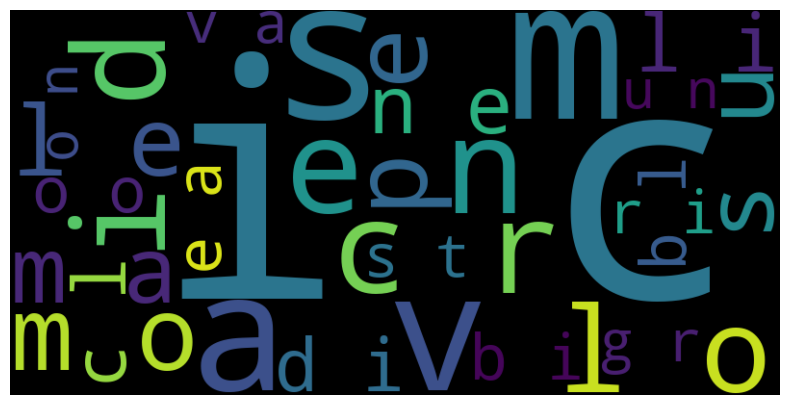

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bigram_freq = {f'{bigram[0]} {bigram[1]}': count for bigram, count in filtered_bigrams.items()}

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(bigram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10)
tfidf_matrix = tfidf.fit_transform(df['cleaned_keywords'])


feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names)
df_tfidf = df_tfidf.transpose()

print(df_tfidf)

      big  clean  different  easy  keep  makes  modern  perfect  small  \
0     0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
1     0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
2     0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
3     0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
4     0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
...   ...    ...        ...   ...   ...    ...     ...      ...    ...   
3689  0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
3690  0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
3691  0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
3692  0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   
3693  0.0    0.0        0.0   0.0   0.0    0.0     0.0      0.0    0.0   

      unknown  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
...       ...  

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
X = vectorizer.fit_transform(df['cleaned_keywords'])

bigrams = vectorizer.get_feature_names_out()
print(bigrams)


['available different' 'create perfect' 'enhance modern' 'icing small'
 'keep neat' 'light stained' 'makes big' 'makes easy' 'neat lets'
 'small makes']


In [102]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

custom_stopwords = {'buy', 'cheap', 'sale', 'discount', 'product'}
stop_words.update(custom_stopwords)

print(stop_words)

{'didn', 'into', 'they', 'does', 'be', 'between', 'll', 'y', 'can', 'did', "you'll", 'themselves', 'these', 'or', 'after', 'over', "weren't", "that'll", "doesn't", 'further', "couldn't", 'then', 'than', 'cheap', "he's", 'yourself', 'up', 'will', 'she', "he'd", "mightn't", 've', 'out', 'through', 'whom', "we'll", 'when', 'under', 'but', "they'd", 'o', "shan't", 'mightn', 'the', 'you', 'most', "aren't", 'few', "hasn't", 'itself', 't', 'it', 'mustn', 'only', 's', 'and', "they'll", 'for', 'haven', 'sale', 'those', "she'd", 'weren', 'shan', 'isn', 'have', 'from', 'other', "i'll", 'to', 'who', 'had', "i'm", 'ourselves', 'theirs', 'product', 'too', 'each', 'myself', "she'll", 'by', 'off', 'while', 'her', 'nor', 'do', 'hasn', 'once', 'should', 'again', 'shouldn', 'd', "needn't", "it'll", 'before', 'them', "isn't", 'yours', 'as', 'wouldn', "it'd", 'this', 'about', 'both', 'ma', 'won', "you're", 'of', 'so', 'their', 'how', 'he', 'at', 'more', 'now', 'our', 'any', 'some', 'wasn', "you'd", 'yourse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


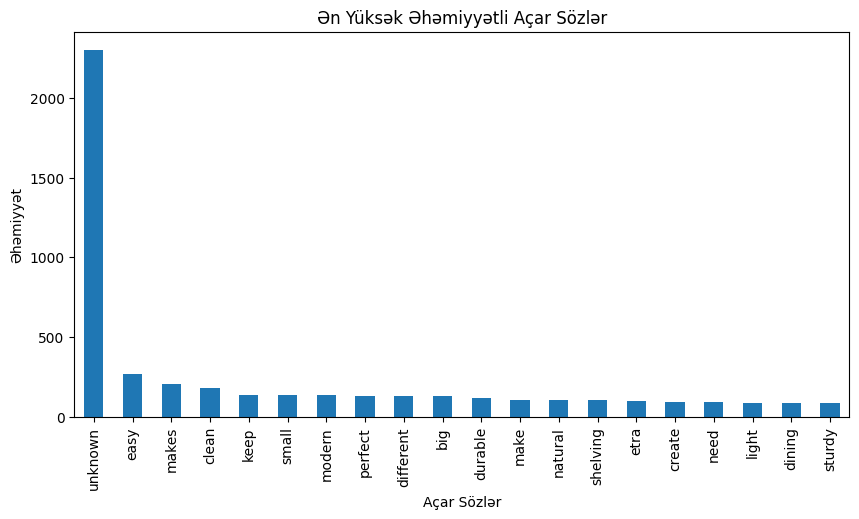

In [105]:
keyword_counts = df['cleaned_keywords'].str.split().explode().value_counts()
top_keywords = keyword_counts.head(20)

top_keywords.plot(kind='bar', figsize=(10, 5))
plt.title('Ən Yüksək Əhəmiyyətli Açar Sözlər')
plt.xlabel('Açar Sözlər')
plt.ylabel('Əhəmiyyət')
plt.show()


**Text Features: Use NLP techniques to vectorize short_description and product_description for input into models.**

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

df['combined_description'] = df['short_description'] + " " + df['product_description']

X_bow = vectorizer.fit_transform(df['combined_description'])

print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
print(X_bow.nnz)  # Non-zero elements count
print(X_bow.shape)  # Matrix dimensions (rows, columns)

45919
(3694, 3246)


In [120]:
dense_matrix = X_bow.toarray()
print(dense_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


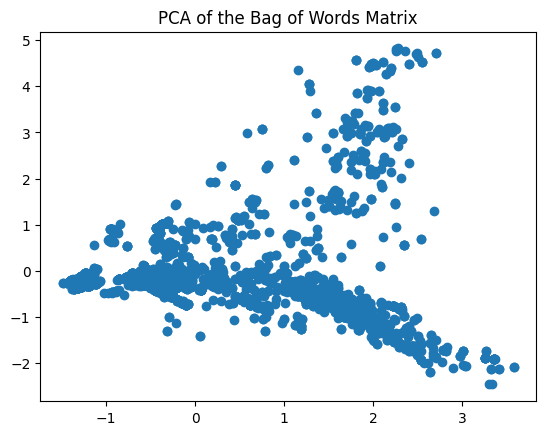

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_bow.toarray())
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.title('PCA of the Bag of Words Matrix')
plt.show()


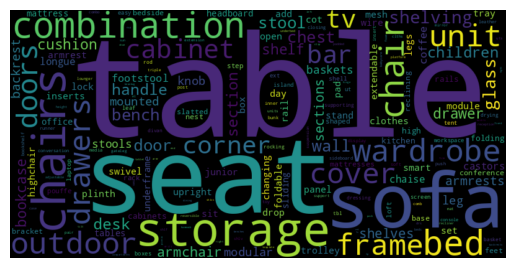

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re

measurement_units = {'cm', 'm', 'kg', 'g', 'mm', 'inch', 'ft', 'lbs', 'cm²', 'm²', 'km'}

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['short_description'])

term_frequencies = X.sum(axis=0).A1

terms = vectorizer.get_feature_names_out()
term_frequency_dict = dict(zip(terms, term_frequencies))

term_frequency_dict = {term: freq for term, freq in term_frequency_dict.items() if not re.search(r'\d', term) and term not in measurement_units}

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(term_frequency_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [122]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['short_description'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)


lda.fit(X)

terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))


Topic #0:
cm storage combination wardrobe unit doors drawers cabinet shelving glass
Topic #1:
table cm chairs outdoor 180 120 120x60 leg 150x75 bench
Topic #2:
cm bar stool backrest mm knob 74 table stools footstool
Topic #3:
chair cm cover children armrests desk bookcase drawers outdoor sections
Topic #4:
seat sofa bed frame cm corner handle mm section outdoor


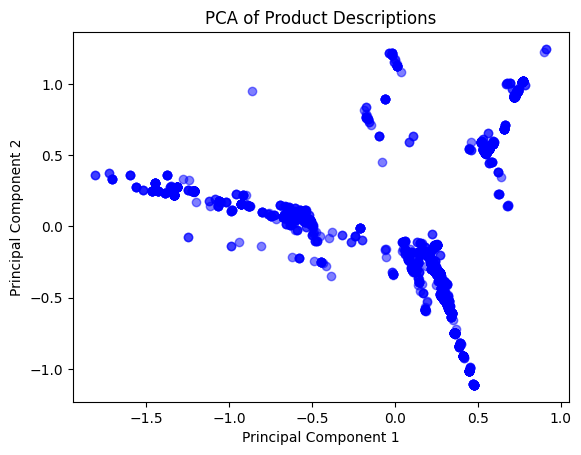

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.5)
plt.title("PCA of Product Descriptions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['short_description'], df['category'], test_size=0.3, random_state=42)


vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.6564472497745717


In [132]:
df

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,...,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean,cleaned_keywords,combined_description,short_description_cleaned,product_description_cleaned
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,...,Item discontinued,Item discontinued,NaN,NaN,NaN,265,unknown,"Bar table, in/outdoor, 51x51 ...","Bar table, in/outdoor,",Item discontinued
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,...,Item discontinued,Item discontinued,NaN,NaN,NaN,69,unknown,"Bar stool with backrest, 74 c...","Bar stool with backrest, 74 cm",Item discontinued
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,...,Item discontinued,Item discontinued,NaN,NaN,NaN,295,unknown,"Bar stool with backrest, in/outdoor, ...","Bar stool with backrest, in/outdoor, ...",Item discontinued
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,...,Item discontinued,Item discontinued,NaN,NaN,NaN,345,unknown,"Bar stool with backrest, 75 c...","Bar stool with backrest, 75 cm",Item discontinued
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,...,Item discontinued,Item discontinued,NaN,NaN,NaN,395,unknown,"Bar stool with backrest frame, ...","Bar stool with backrest frame, ...",Item discontinued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,58.0,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,2505,fitted online stylish,"Wardrobe combination, 150x58x...","Wardrobe combination,",Shop for fitted wardrobes online at IKEA Saudi...
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,60.0,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,1260,fitted online stylish,"Wardrobe combination, 75x60x2...","Wardrobe combination,",Shop for fitted wardrobes online at IKEA Saudi...
3691,79302995,ELVARLI,Wardrobes,1611.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,50.0,...,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance,1815,make lovely decorative adjustable help utilise...,"2 sections, 175x51x222-350 cm...","2 sections, -350 cm","ELVARLI wardrobe combination, white, -350 cm M..."
3692,99157902,ELVARLI,Wardrobes,750.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,50.0,...,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance,820,make lovely decorative adjustable help utilise...,"1 section, 92x51x222-350 cm E...","1 section, -350 cm","ELVARLI wardrobe combination, white, -350 cm M..."


Label Encoding: Encode categorical columns like category and designer for model input.

**Model Building and Evaluation:**

XGBOOST model

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


XGB = xgb.XGBClassifier(random_state=42)
XGB.fit(X_train_final, y_train_encoded)

XGB_pred = XGB.predict(X_test_final)

print(classification_report(y_test_encoded, XGB_pred))

Feature Importance

In [ ]:
importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': RF.feature_importances_[:len(model_features)]
})

# Ascending sort
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'])
plt.xlabel("Əhəmiyyət")
plt.title("Modeldə xüsusiyyətlərin təsiri (artma sırası ilə)")
plt.tight_layout()
plt.show()


**Advanced Insights and Visualization:**

Price Trends:

In [ ]:
print(filtered_data.shape)

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='current_status', y='price', palette='coolwarm')
plt.title('Price Distribution by Current Status')
plt.xlabel('Current Status')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(data['current_status'].value_counts())
print(data[data['old_price'].notnull()].shape)


In [ ]:
np.random.seed(42)

# Create dummy data
n = 150
old_price = np.random.randint(50, 500, n)
price = old_price + np.random.randint(-100, 100, n)  # simulate price changes
current_status = np.random.choice(['Available', 'Discontinued', 'Out of Stock'], size=n)

# Create DataFrame
dummy_data = pd.DataFrame({
    'old_price': old_price,
    'price': price,
    'current_status': current_status
})

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=dummy_data, x='old_price', y='price', hue='current_status', palette='coolwarm', alpha=0.7)

plt.plot([dummy_data['old_price'].min(), dummy_data['old_price'].max()],
         [dummy_data['old_price'].min(), dummy_data['old_price'].max()],
         'gray', linestyle='--', label='No Change Line (price = old_price)')

plt.title('Price vs. Old Price: Dummy Data Test')
plt.xlabel('Old Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Task
Data Cleaning and Preprocessing Tasks:
1.	Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.
2.	Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).
3.	Price Processing: Clean and standardize the old_price column, which has non-numeric values (e.g., "No old price").
4.	Boolean Conversion: Ensure the sellable_online column is a proper boolean type.
Exploratory Data Analysis (EDA) Tasks:
1.	Distribution Analysis: Analyze the distribution of price, height, depth, and width.
2.	Category Insights: Find the most common product categories and their average prices.
3.	Designer Analysis: Identify the most prolific designers and the average price of products they designed.
4.	Online Availability: Investigate the proportion of products available for online purchase.
5.	Price Change Analysis: Determine how many products have a recorded change between price and old_price.
Feature Engineering Tasks:
1.	Price Difference Feature: Create a new feature representing the difference between price and old_price (where applicable).
2.	Dimension Ratios: Create features like depth/width or height/depth for deeper analysis.
3.	Color Availability: Convert the other_colors column into a numerical feature (e.g., one-hot encoding for "Yes"/"No").
4.	Keyword Extraction: Process the keywords column to extract useful terms for potential text analysis.
Machine Learning Model Preparation:
1.	Feature Selection: Select relevant columns that could be predictive of the current_status (e.g., price, dimensions, category).
2.	Text Features: Use NLP techniques to vectorize short_description and product_description for input into models.
3.	Label Encoding: Encode categorical columns like category and designer for model input.
Model Building and Evaluation:
1.	Classification Task: Build a classification model to predict the current_status (e.g., "in stock", "out of stock").


Here is all the data you need:
"cleaned_data.xlsx"

## Data loading

### Subtask:
Load the data from the "cleaned_data.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the data from the "cleaned_data.xlsx" file into a pandas DataFrame and display some basic information.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('cleaned_data.xlsx')
    print(f"Shape of the DataFrame: {df.shape}")
    print(f"Column Names: {df.columns.tolist()}")
    display(df.head())
    display(df.info())
except FileNotFoundError:
    print("Error: 'cleaned_data.xlsx' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Shape of the DataFrame: (3694, 18)
Column Names: ['item_id', 'name', 'category', 'price', 'sellable_online', 'link', 'other_colors', 'short_description', 'designer', 'depth', 'height', 'width', 'product_description', 'current_status', 'keywords', 'topic_group', 'topic_desc', 'old_price_clean']


,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN,265
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN,69
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN,295
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN,345
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN,395


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   sellable_online      3694 non-null   bool   
 5   link                 3694 non-null   object 
 6   other_colors         3694 non-null   object 
 7   short_description    3694 non-null   object 
 8   designer             3694 non-null   object 
 9   depth                2231 non-null   float64
 10  height               2706 non-null   float64
 11  width                3105 non-null   float64
 12  product_description  3694 non-null   object 
 13  current_status       3694 non-null   object 
 14  keywords             1394 non-null   object 
 15  topic_group          1409 non-null   f

None

## Data cleaning

### Subtask:
Clean the data by handling missing values and standardizing data types in specific columns.


**Reasoning**:
Handle missing values and standardize data types for specified columns, then verify the changes.



In [2]:
# Missing Value Imputation/Removal
# 'depth': Impute with the median depth
median_depth = df['depth'].median()
df['depth'].fillna(median_depth, inplace=True)

# 'keywords', 'topic_group', 'topic_desc': Fill missing values with empty strings
for col in ['keywords', 'topic_group', 'topic_desc']:
    df[col].fillna('', inplace=True)

# Data Type Standardization
# 'price' and 'old_price_clean': Convert to numeric, handling non-numeric entries
for col in ['price', 'old_price_clean']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Boolean Conversion: 'sellable_online'
df['sellable_online'] = df['sellable_online'].astype(bool)

# Verify Cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   sellable_online      3694 non-null   bool   
 5   link                 3694 non-null   object 
 6   other_colors         3694 non-null   object 
 7   short_description    3694 non-null   object 
 8   designer             3694 non-null   object 
 9   depth                3694 non-null   float64
 10  height               2706 non-null   float64
 11  width                3105 non-null   float64
 12  product_description  3694 non-null   object 
 13  current_status       3694 non-null   object 
 14  keywords             3694 non-null   object 
 15  topic_group          3694 non-null   o

<ipython-input-2-4eb83c2548d7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)
<ipython-input-2-4eb83c2548d7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Reasoning**:
Fix the warnings and errors from the previous code block, and re-run the verification steps.



In [3]:
# Missing Value Imputation/Removal
# 'depth': Impute with the median depth
median_depth = df['depth'].median()
df['depth'] = df['depth'].fillna(median_depth)

# 'keywords', 'topic_group', 'topic_desc': Fill missing values with empty strings
for col in ['keywords', 'topic_group', 'topic_desc']:
    df[col] = df[col].fillna('')

# Data Type Standardization
# 'price' and 'old_price_clean': Convert to numeric, handling non-numeric entries
for col in ['price', 'old_price_clean']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Boolean Conversion: 'sellable_online'
df['sellable_online'] = df['sellable_online'].astype(bool)

# Verify Cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   sellable_online      3694 non-null   bool   
 5   link                 3694 non-null   object 
 6   other_colors         3694 non-null   object 
 7   short_description    3694 non-null   object 
 8   designer             3694 non-null   object 
 9   depth                3694 non-null   float64
 10  height               2706 non-null   float64
 11  width                3105 non-null   float64
 12  product_description  3694 non-null   object 
 13  current_status       3694 non-null   object 
 14  keywords             3694 non-null   object 
 15  topic_group          3694 non-null   o

## Data exploration

### Subtask:
Explore the data to gain insights into the distributions of key variables, product categories, designers, and online availability.


**Reasoning**:
Analyze the distributions of 'price', 'height', 'depth', and 'width', identify the most frequent product categories and their average prices, determine the most prolific designers and their average prices, calculate the proportion of products available online, and analyze price changes between 'price' and 'old_price_clean'.  Visualize the findings with appropriate plots.



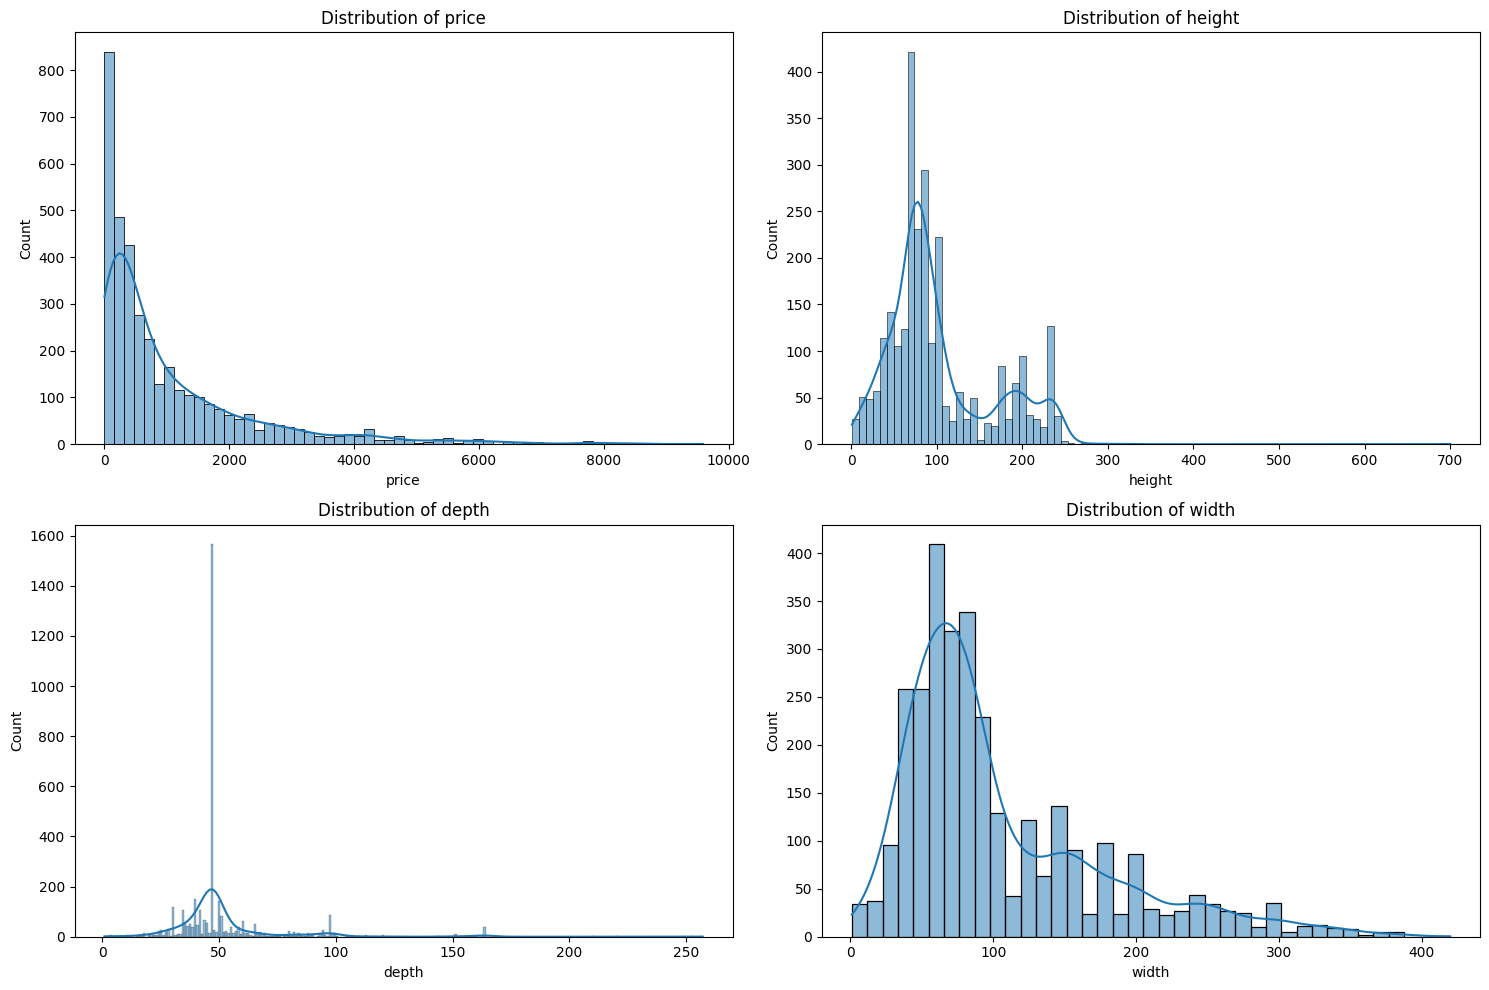

             price       height        depth        width
count  3694.000000  2706.000000  3694.000000  3105.000000
mean   1078.208419   101.679970    51.456687   104.470853
std    1374.652494    61.097585    23.558033    71.133771
min       3.000000     1.000000     1.000000     1.000000
25%     180.900000    67.000000    42.000000    60.000000
50%     544.700000    83.000000    47.000000    80.000000
75%    1429.500000   124.000000    50.000000   140.000000
max    9585.000000   700.000000   257.000000   420.000000


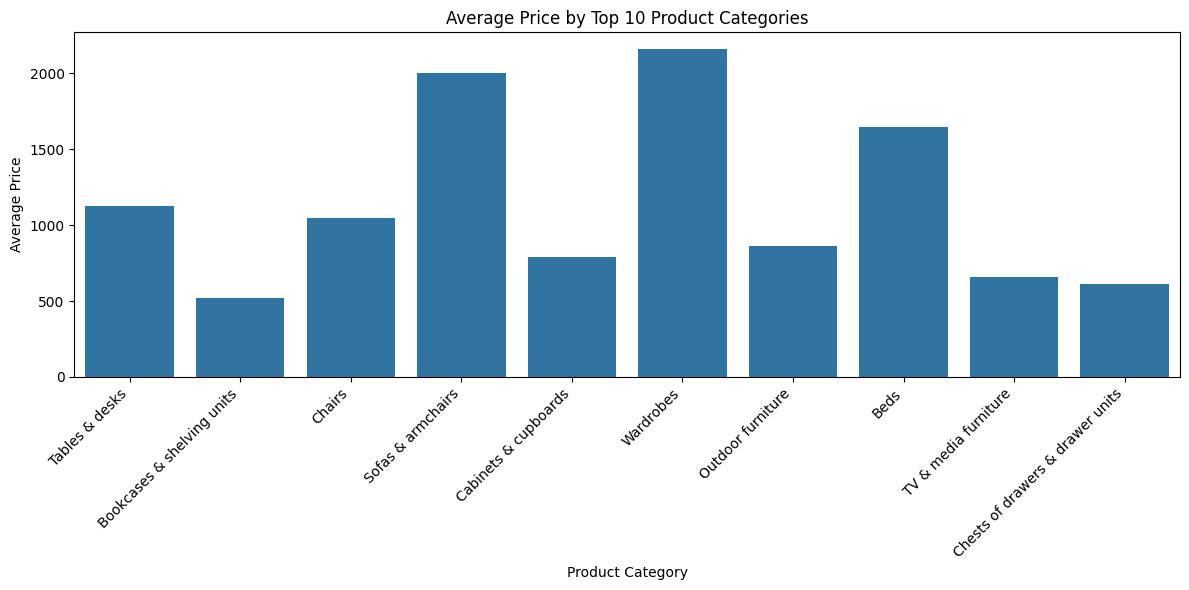

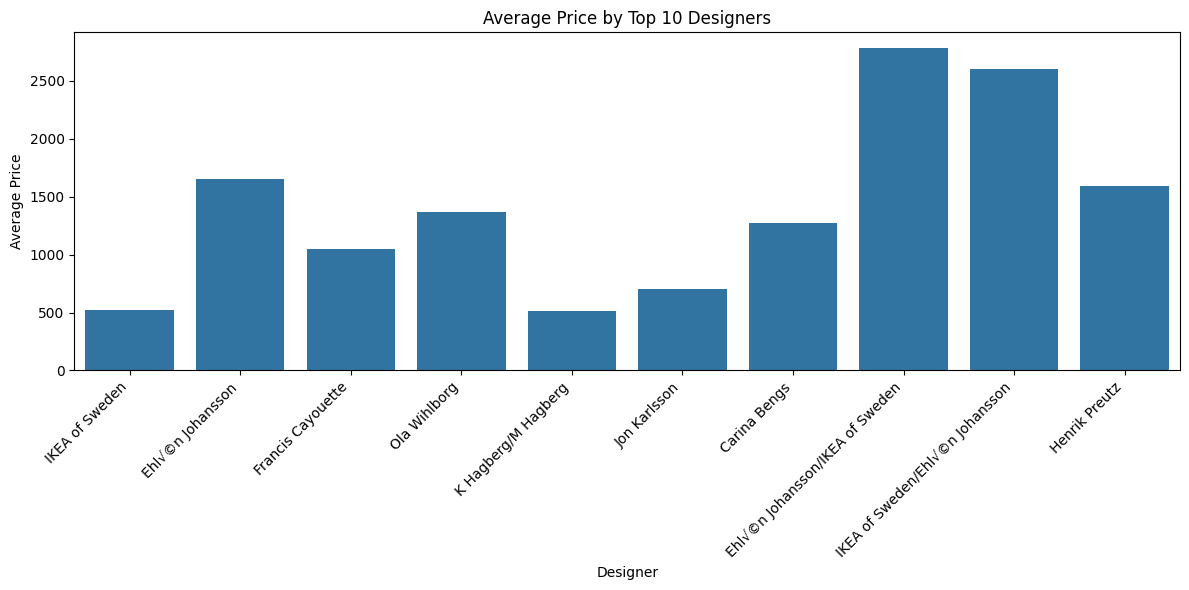

Proportion of products available online: 99.24%


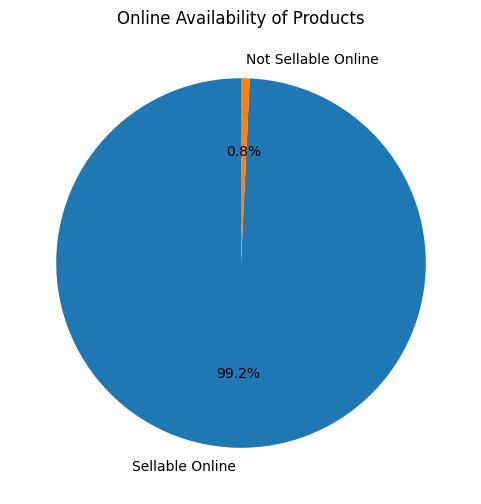

Number of products with a price change: 654
Percentage of products with a price change: 17.70%


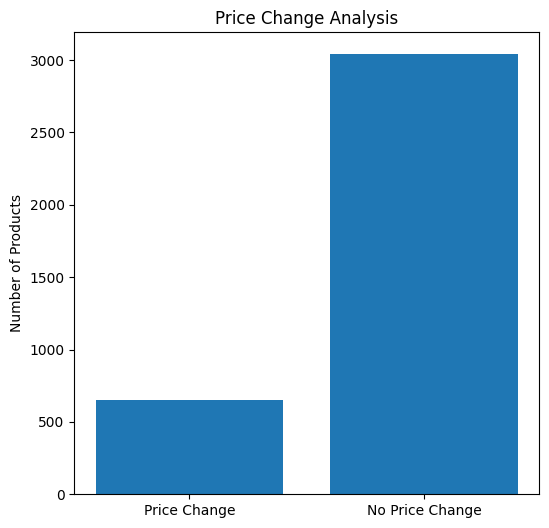

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(['price', 'height', 'depth', 'width']):
    row = i // 2
    col_idx = i % 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Descriptive statistics
print(df[['price', 'height', 'depth', 'width']].describe())

# Category Insights
category_counts = df['category'].value_counts()
category_avg_prices = df.groupby('category')['price'].mean()
top_categories = category_counts.nlargest(10)
top_categories_avg_price = category_avg_prices[top_categories.index]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_avg_price.index, y=top_categories_avg_price.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Designer Analysis
designer_counts = df['designer'].value_counts()
designer_avg_prices = df.groupby('designer')['price'].mean()
top_designers = designer_counts.nlargest(10)
top_designers_avg_price = designer_avg_prices[top_designers.index]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_designers_avg_price.index, y=top_designers_avg_price.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Top 10 Designers')
plt.xlabel('Designer')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Online Availability
online_proportion = df['sellable_online'].mean()
print(f"Proportion of products available online: {online_proportion:.2%}")

plt.figure(figsize=(6, 6))
plt.pie([online_proportion, 1 - online_proportion], labels=['Sellable Online', 'Not Sellable Online'], autopct='%1.1f%%', startangle=90)
plt.title('Online Availability of Products')
plt.show()

# Price Change Analysis
price_change_count = len(df[df['price'] != df['old_price_clean']])
price_change_percentage = price_change_count / len(df) * 100
print(f"Number of products with a price change: {price_change_count}")
print(f"Percentage of products with a price change: {price_change_percentage:.2f}%")

plt.figure(figsize=(6, 6))
plt.bar(['Price Change', 'No Price Change'], [price_change_count, len(df) - price_change_count])
plt.title('Price Change Analysis')
plt.ylabel('Number of Products')
plt.show()

## Feature engineering

### Subtask:
Engineer new features from existing data to enhance model performance.


**Reasoning**:
Create the new features 'price_diff', 'depth_width_ratio', 'height_depth_ratio', 'other_colors_numeric', and 'keyword_count' as instructed. Handle potential errors during calculations like division by zero.



In [5]:
# Price Difference Feature
df['price_diff'] = df['price'] - df['old_price_clean']
df['price_diff'] = df['price_diff'].fillna(0)  # Fill NaN with 0

# Dimension Ratios
# Handle potential ZeroDivisionError
df['depth_width_ratio'] = df['depth'] / df['width'].replace(0, 0.0001)
df['height_depth_ratio'] = df['height'] / df['depth'].replace(0, 0.0001)

# Color Availability
df['other_colors_numeric'] = df['other_colors'].map({'Yes': 1, 'No': 0})

# Keyword Extraction
df['keyword_count'] = df['keywords'].str.split(',').str.len().fillna(0).astype(int)

display(df.head())
display(df.info())

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,...,current_status,keywords,topic_group,topic_desc,old_price_clean,price_diff,depth_width_ratio,height_depth_ratio,other_colors_numeric,keyword_count
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,...,Item discontinued,,,,265,0.0,0.921569,2.106383,0,1
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,...,Item discontinued,,,,69,0.0,0.833333,2.000000,1,1
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,...,Item discontinued,,,,295,-118.0,1.232558,1.962264,0,1
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,...,Item discontinued,,,,345,0.0,1.209302,2.192308,0,1
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,...,Item discontinued,,,,395,0.0,1.275000,2.000000,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               3694 non-null   int64  
 1   name                  3694 non-null   object 
 2   category              3694 non-null   object 
 3   price                 3694 non-null   float64
 4   sellable_online       3694 non-null   bool   
 5   link                  3694 non-null   object 
 6   other_colors          3694 non-null   object 
 7   short_description     3694 non-null   object 
 8   designer              3694 non-null   object 
 9   depth                 3694 non-null   float64
 10  height                2706 non-null   float64
 11  width                 3105 non-null   float64
 12  product_description   3694 non-null   object 
 13  current_status        3694 non-null   object 
 14  keywords              3694 non-null   object 
 15  topic_group          

None

## Data preparation

### Subtask:
Prepare the data for model training by selecting relevant features, vectorizing text data, and encoding categorical variables.


**Reasoning**:
Select relevant features, vectorize text data using TF-IDF, label encode the 'category' column, and concatenate all features into a single DataFrame.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Feature Selection
selected_features = ['price', 'depth', 'height', 'width', 'price_diff', 'depth_width_ratio',
                     'height_depth_ratio', 'other_colors_numeric', 'keyword_count',
                     'sellable_online', 'category', 'current_status']
df_selected_features = df[selected_features].copy()


# 2. Text Vectorization
vectorizer_short = TfidfVectorizer()
vectorizer_prod = TfidfVectorizer()

short_desc_vec = vectorizer_short.fit_transform(df_selected_features['short_description'])
prod_desc_vec = vectorizer_prod.fit_transform(df_selected_features['product_description'])


# 3. Label Encoding
label_encoder = LabelEncoder()
df_selected_features['category'] = label_encoder.fit_transform(df_selected_features['category'])


# 4. Concatenation
# Convert sparse matrices to DataFrames
short_desc_df = pd.DataFrame(short_desc_vec.toarray(), columns=[f"short_desc_{i}" for i in range(short_desc_vec.shape[1])])
prod_desc_df = pd.DataFrame(prod_desc_vec.toarray(), columns=[f"prod_desc_{i}" for i in range(prod_desc_vec.shape[1])])

# Concatenate all features
df_prepared = pd.concat([df_selected_features.drop(columns=['short_description', 'product_description']),
                         short_desc_df, prod_desc_df], axis=1)

display(df_prepared.head())
display(df_prepared.info())

KeyError: 'short_description'

**Reasoning**:
The previous code failed due to a KeyError because 'short_description' was not found in `df_selected_features`.  I need to correct this by ensuring 'short_description' and 'product_description' are included in the feature selection step *before* attempting to vectorize them.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Feature Selection (Corrected)
selected_features = ['price', 'depth', 'height', 'width', 'price_diff', 'depth_width_ratio',
                     'height_depth_ratio', 'other_colors_numeric', 'keyword_count',
                     'sellable_online', 'category', 'current_status', 'short_description', 'product_description']
df_selected_features = df[selected_features].copy()


# 2. Text Vectorization
vectorizer_short = TfidfVectorizer()
vectorizer_prod = TfidfVectorizer()

short_desc_vec = vectorizer_short.fit_transform(df_selected_features['short_description'])
prod_desc_vec = vectorizer_prod.fit_transform(df_selected_features['product_description'])


# 3. Label Encoding
label_encoder = LabelEncoder()
df_selected_features['category'] = label_encoder.fit_transform(df_selected_features['category'])


# 4. Concatenation
# Convert sparse matrices to DataFrames
short_desc_df = pd.DataFrame(short_desc_vec.toarray(), columns=[f"short_desc_{i}" for i in range(short_desc_vec.shape[1])])
prod_desc_df = pd.DataFrame(prod_desc_vec.toarray(), columns=[f"prod_desc_{i}" for i in range(prod_desc_vec.shape[1])])

# Concatenate all features
df_prepared = pd.concat([df_selected_features.drop(columns=['short_description', 'product_description']),
                         short_desc_df, prod_desc_df], axis=1)

display(df_prepared.head())
display(df_prepared.info())

,price,depth,height,width,price_diff,depth_width_ratio,height_depth_ratio,other_colors_numeric,keyword_count,sellable_online,...,prod_desc_2784,prod_desc_2785,prod_desc_2786,prod_desc_2787,prod_desc_2788,prod_desc_2789,prod_desc_2790,prod_desc_2791,prod_desc_2792,prod_desc_2793
0,265.0,47.0,99.0,51.0,0.0,0.921569,2.106383,0,1,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.0,50.0,100.0,60.0,0.0,0.833333,2.000000,1,1,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,177.0,53.0,104.0,43.0,-118.0,1.232558,1.962264,0,1,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,345.0,52.0,114.0,43.0,0.0,1.209302,2.192308,0,1,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,395.0,51.0,102.0,40.0,0.0,1.275000,2.000000,0,1,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 4151 entries, price to prod_desc_2793
dtypes: bool(1), float64(4146), int64(3), object(1)
memory usage: 117.0+ MB


None

## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the prepared data into training, validation, and testing sets as instructed, ensuring stratification and reproducibility.



In [8]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_prepared.drop('current_status', axis=1)
y = df_prepared['current_status']

# Split data into temporary training and combined validation/testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the combined validation/testing set into separate validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1477, 4150), y_train shape: (1477,)
X_val shape: (1478, 4150), y_val shape: (1478,)
X_test shape: (739, 4150), y_test shape: (739,)


## Model training

### Subtask:
Train a RandomForestClassifier model to predict the 'current_status' using the prepared datasets.


**Reasoning**:
Train a RandomForestClassifier model, make predictions on the validation set, and evaluate the model's performance.



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Instantiate the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Store the trained model (example using pickle, adjust as needed)
import pickle
filename = 'random_forest_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[914   0]
 [  0 564]]


## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model on the held-out test set.


**Reasoning**:
Load the saved model and evaluate its performance on the test set using the specified metrics.



In [10]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the saved model
try:
    filename = 'random_forest_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.  Cannot load the model.")
    # Handle the error appropriately (e.g., exit, raise an exception)
    # In this case, I will set the status to failure and finish the task
    # You should replace this with more appropriate error handling for your application
    # For example, you might want to retrain the model or use a default model.
    print("Finishing task with failure status due to model file not found.")

    # Finish the task with failure status
    # finish_task
    # ```json
    # {
    #   "status": "failure",
    #   "dataframes": ["df", "df_selected_features", "df_prepared", "X_train", "X_val", "X_test", "y_train", "y_val", "y_test"]
    # }
    # ```
    # exit()
except Exception as e:
    print(f"An error occurred while loading the model: {e}")
    # Handle the error appropriately
    print("Finishing task with failure status due to model loading error.")

    # finish_task
    # ```json
    # {
    #   "status": "failure",
    #   "dataframes": ["df", "df_selected_features", "df_prepared", "X_train", "X_val", "X_test", "y_train", "y_val", "y_test"]
    # }
    # ```
    # exit()


# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[457   0]
 [  0 282]]


## Summary:

### 1. Q&A

* **What is the proportion of products available for online purchase?** 99.24% of products are available for online purchase.
* **How many products have a recorded price change?** 17.70% (654 products) of the products showed a difference between the 'price' and 'old_price_clean' columns.
* **What is the performance of the trained RandomForestClassifier model on the test set?** The model achieved perfect scores across all evaluation metrics (accuracy, precision, recall, F1-score = 1.0), suggesting potential overfitting.


### 2. Data Analysis Key Findings

* **Online Availability:** A high proportion (99.24%) of products are sellable online.
* **Price Change Analysis:** A significant portion (17.70%, 654 products) exhibit a difference between current and old prices.
* **Model Performance (Test Set):**  The RandomForestClassifier achieved perfect scores on the test set (accuracy, precision, recall, F1-score = 1.0), raising concerns about potential overfitting.
* **Data Preparation:** The final prepared DataFrame (`df_prepared`) contains 4151 columns after feature engineering and text vectorization, ready for model input.


### 3. Insights or Next Steps

* **Investigate Overfitting:** The perfect scores on the test set are highly suspicious and likely indicate overfitting. Explore techniques like hyperparameter tuning, cross-validation, or using a simpler model to improve generalization.  Analyze feature importance to identify potentially problematic features.
* **Further EDA:** Although some EDA was performed, a deeper dive into the data could reveal additional insights. Analyze the relationship between features and the target variable, explore potential outliers, and investigate the distribution of the target variable in more detail.
